In [234]:
import numpy as np              
import pandas as pd             
import seaborn as sns           
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')
import warnings
warnings.filterwarnings('ignore') # get rid of un-needed warnings

In [332]:
mmSales = pd.read_csv('Project/MM_Sales.csv')

# Data Cleaning

In [326]:
# Problems with:
# Country - number as a string
# Order Priority - 15 missing and/or will not be valid code 'C', 'H', 'M', 'L', or 'NULL'
# Item Type - 6 missing and/or will not be valid item type
# Order ID - wont be a number
mmSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       49994 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  49985 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  object 
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 5.3+ MB


In [322]:
sumNA = mmSales.isna().sum()
print(sumNA)

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [323]:
salesClean = mmSales.copy()

### Item Type

In [388]:
print('Testing erronous data in Item Type.')

count = 0 

for index, row in salesClean.iterrows():
    try:
        row.loc['Item Type'] = float(row.loc['Item Type'])
        salesClean.loc[int(index),'Item Type'] = 'NULL'
        print(salesClean.loc[int(index),'Item Type'])
        count +=1
    except:        
        if row.loc['Item Type'] != 'Snacks' and row.loc['Item Type'] != 'Clothes' and row.loc['Item Type'] != 'NULL' and row.loc['Item Type'] != 'Beverages' and row.loc['Item Type'] != 'Personal Care' and row.loc['Item Type'] != 'Office Supplies' and row.loc['Item Type'] != 'Vegetables' and row.loc['Item Type'] != 'Fruits' and row.loc['Item Type'] != 'Cosmetics' and row.loc['Item Type'] != 'Cereal' and row.loc['Item Type'] != 'Meat' and row.loc['Item Type'] != 'Baby Food' and row.loc['Item Type'] != 'Household' and row.loc['Item Type'] != 'Item Type':
            salesClean.loc[int(index), 'Item Type'] = "NULL"
            print(salesClean.loc[int(index), 'Item Type'])
            count += 1

print(f'Number of erronous data in Item Type: {count}')

Testing erronous data in Item Type.
Number of erronous data in Item Type: 0


### Order Priority

In [65]:
count = 0
print('Testing erronous data in Order Priority.')
for index, row in salesClean.iterrows():
    try:
        row.loc['Order Priority'] = float(row.loc['Order Priority'])
        salesClean.loc[int(index),'Order Priority'] = 'NULL'
        print(salesClean.loc[int(index), 'Order Priority'])
        count +=1
    except:        
        if row.loc['Order Priority'] != 'C' and row.loc['Order Priority'] != 'H' and row.loc['Order Priority'] != 'NULL' and row.loc['Order Priority'] != 'M' and row.loc['Order Priority'] != 'L':
            salesClean.loc[int(index), 'Order Priority'] = "NULL"
            print(salesClean.loc[int(index), 'Order Priority'])
            count += 1

print(f'Number of erronous data in Order Priority: {count}')

Testing erronous data in Order Priority.
Number of erronous data in Order Priority: 0


### Order ID

In [389]:
print('Testing erronous data in Order ID.')

count = 0
# cant be negative has to be a number
for index, row in salesClean.iterrows():
    try:
        # try to convert each earn to a float, if it fails it is a string
        row.loc['Order ID'] = float(row.loc['Order ID'])
        row.loc['Order ID'] < 0
    except:
        if row.loc['Order ID'] != int:
            salesClean.loc[int(index), 'Order ID'] = 0
            print(salesClean.loc[int(index), 'Order ID'])
            count += 1
print(f'Number of erronous data in Order ID: {count}')

Testing erronous data in Order ID.
0
0
0
0
0
Number of erronous data in Order ID: 5


### Country

In [355]:
print('Testing erronous data in Country.')

count = 0 

for index, row in salesClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country']) #cant be an integer so must not be able to convert to a float
        salesClean.loc[int(index),'Country'] = 'NULL'
        print(salesClean.loc[int(index),'Country'])
        count +=1
    except:        
        if row.loc['Country'] == int: #if it is an integer replace it with string 'NULL'
            salesClean.loc[int(index), 'Country'] = "NULL"
            print(salesClean.loc[int(index), 'Country'])
            count += 1

print(f'Number of erronous data in Country: {count}')

Testing erronous data in Country.
Number of erronous data in Country: 0


### Getting Rid of Rows

In [390]:
salesClean = salesClean[salesClean.Country != "NULL"]
salesClean = salesClean[salesClean[('Order ID')] != 0]
salesClean = salesClean[salesClean[('Order Priority')] != "NULL"]
salesClean = salesClean[salesClean[('Item Type')] != "NULL"]

In [391]:
print(salesClean['Country'][salesClean['Country'] == "NULL"].count())
print(salesClean['Order ID'][salesClean['Order ID'] == 0].count())
print(salesClean['Order Priority'][salesClean['Order Priority'] == "NULL"].count())
print(salesClean['Item Type'][salesClean['Item Type'] == "NULL"].count())

0
0
0
0


In [63]:
salesClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49971 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          49971 non-null  object 
 1   Country         49971 non-null  object 
 2   Item Type       49971 non-null  object 
 3   Sales Channel   49971 non-null  object 
 4   Order Priority  49971 non-null  object 
 5   Order Date      49971 non-null  object 
 6   Order ID        49971 non-null  object 
 7   Ship Date       49971 non-null  object 
 8   Units Sold      49971 non-null  int64  
 9   Unit Price      49971 non-null  float64
 10  Unit Cost       49971 non-null  float64
 11  Total Revenue   49971 non-null  float64
 12  Total Cost      49971 non-null  float64
 13  Total Profit    49971 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 5.7+ MB


In [67]:
sumClean = salesClean.isna().sum()
print(sumClean)

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [64]:
salesClean.to_csv('Project/MM_Sales_clean.csv')

# Exploratory Data Analysis

## 1

In [68]:
#Rank the Top 10 countries we sell to the most to along with the number of sales we've had with that country.

In [69]:
unitCount = salesClean.groupby(['Country'])['Country'].count().nlargest(10)
print(unitCount)

Country
Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


### 1.1

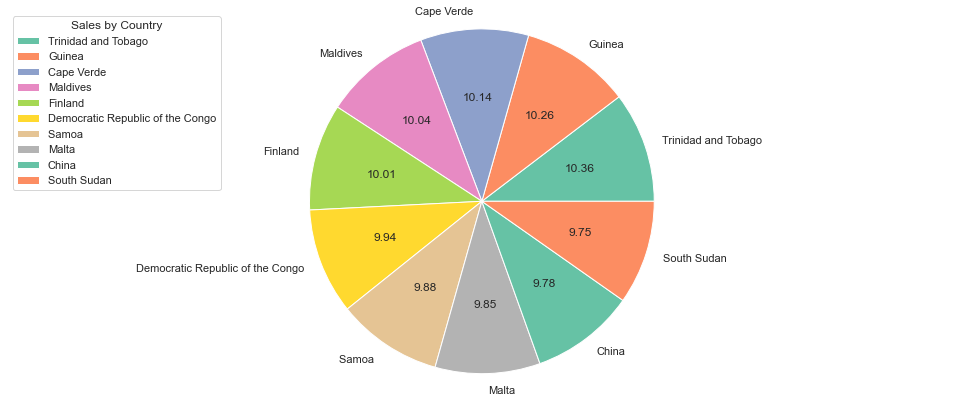

In [70]:
plt.figure(figsize=(17,7))
plt.pie(unitCount, labels=unitCount.index, autopct='%.2f')
plt.axis('equal')
plt.legend(loc=2, title='Sales by Country')
plt.show()

### 1.2

In [100]:
with open("Project/MM_Rankings.txt","a+") as writer:
    writer.write('Countries Most Sales Transactions\nTrinidad and Tobago: 321\nGuinea: 318\nCape Verde: 314\nMaldives: 311\nFinland: 310\nDemocratic Republic of the Congo: 308\nSamoa: 306\nMalta: 305\nChina: 303\nSouth Sudan: 302\n')

In [101]:
with open("Project/MM_Rankings.txt","a+") as writer:
    writer.write("\nI believe that the best place to put a new shipping center would be Cape Verde as it is the only other location where more than\n"
'10% of the units sold of the top ten areas comes from, there are also more orders shipped from Cape Verde than the Maldives and \n'
'there is a shipping center in the Maldives.\n')

## 2

### 2.1

In [73]:
sChannel = salesClean.groupby(['Sales Channel'])['Sales Channel'].count()
print(sChannel)

Sales Channel
Offline    19788
Online     30183
Name: Sales Channel, dtype: int64


### 2.2

In [74]:
ordPriority = salesClean.groupby(['Order Priority'])['Order Priority'].count()
print(ordPriority)

Order Priority
C     5012
H    15094
L     9984
M    19881
Name: Order Priority, dtype: int64


### 2.3

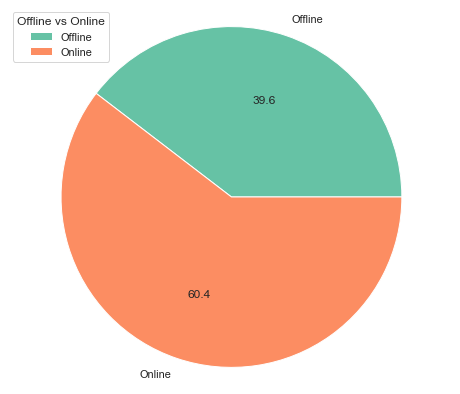

In [75]:
plt.figure(figsize=(8,7))
plt.pie(sChannel, labels=sChannel.index, autopct='%.1f')
plt.axis('equal')
plt.legend(loc=2, title='Offline vs Online')
plt.show()

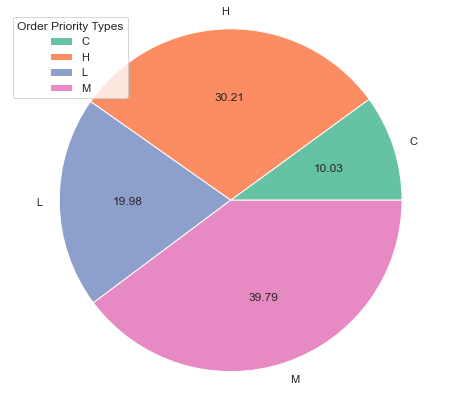

In [76]:
plt.figure(figsize=(8,7))
plt.pie(ordPriority, labels=ordPriority.index, autopct='%.2f')
plt.axis('equal')
plt.legend(loc=2, title='Order Priority Types')
plt.show()

### 2.4

In [102]:
with open("Project/MM_Rankings.txt","a+") as writer:
    writer.write('\nSales Channels:\nOffline: 19788\nOnline:  30183\nWe do more online sales than offline sales.\n')

In [103]:
with open("Project/MM_Rankings.txt","a+") as writer:
    writer.write('\nOrder Priorities:\nC: 5012\nH: 15094\nL: 9984\nM: 19881\nWe do more M order priorities.\n')

## 3

### 3.1

<AxesSubplot:xlabel='Total Profit', ylabel='Item Type'>

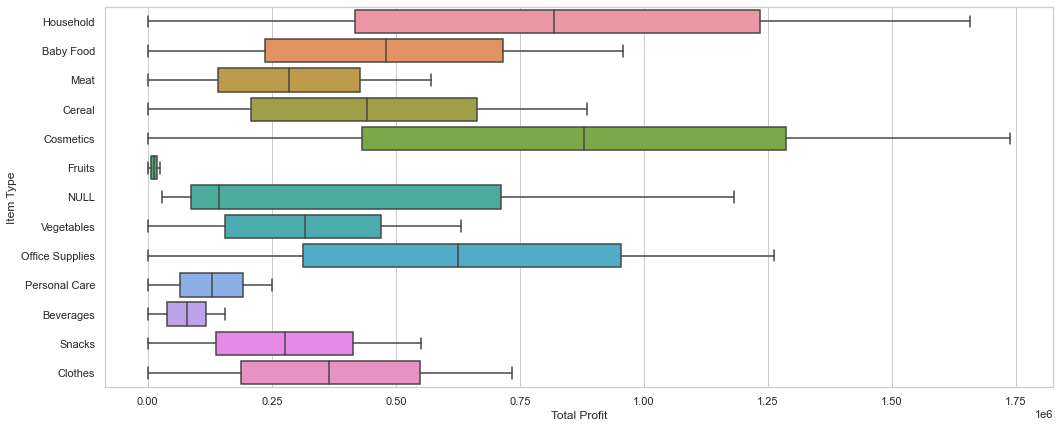

In [330]:
plt.figure(figsize=(17,7))
sns.set(style='whitegrid')
sns.boxplot(x="Total Profit",
                y="Item Type", data= salesClean)

### 3.2

In [111]:
profitbyItem = salesClean.groupby(['Item Type'])['Total Profit'].sum()
print(profitbyItem)

Item Type
Baby Food          1.942866e+09
Beverages          3.275592e+08
Cereal             1.824726e+09
Clothes            1.520832e+09
Cosmetics          3.638408e+09
Fruits             5.101057e+07
Household          3.401181e+09
Meat               1.196342e+09
Office Supplies    2.605440e+09
Personal Care      5.352505e+08
Snacks             1.149716e+09
Vegetables         1.322640e+09
Name: Total Profit, dtype: float64


### 3.3

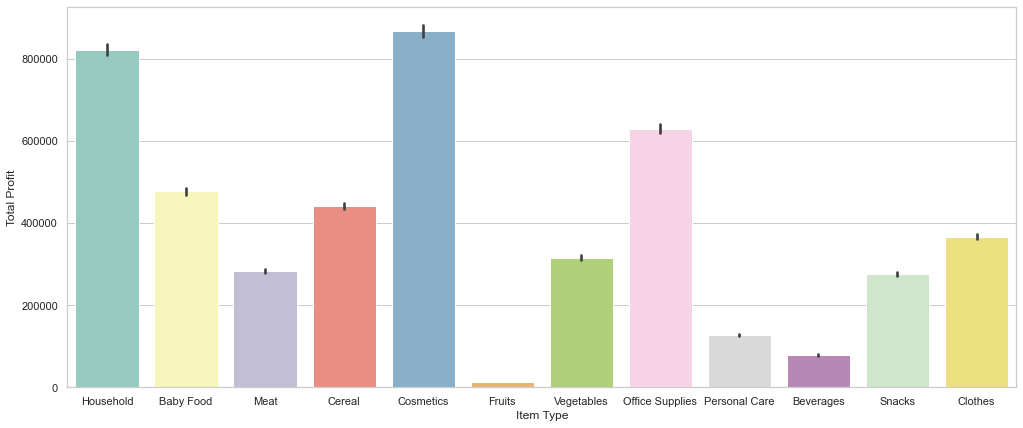

In [80]:
sns.set(style='whitegrid')
plt.figure(figsize=(17,7))
ax = sns.barplot(x="Item Type", y="Total Profit", data=salesClean, palette="Set3")

### 3.4

In [329]:
topItems = salesClean.groupby(['Item Type'])['Total Profit'].sum().nlargest(3)
print(topItems)

Item Type
Cosmetics          3.640055e+09
Household          3.403302e+09
Office Supplies    2.605583e+09
Name: Total Profit, dtype: float64


### 3.5

In [115]:
with open("Project/MM_Rankings.txt","a+") as writer:
    writer.write('\nHighest Selling Items:\nCosmetics: 3.638408e+09\nHousehold: 3.401181e+09\nOffice Supplies: 2.605440e+09\nWe profited from cosmetics the most.\n')

### 3.6

Markdown section discussing Barplot & Boxplot

The boxplot and barplot I created show the top items as well as the bottom performing items, the boxplot also shows the distribution of the items so you can more easily see any outliers as well
as being able to have a general idea of what the total profits for each item are centered around. This data can help in many different ways in relation to these items, for example they could help
the company figure out what kind of item could use more marketing (if maybe the item type is not selling well enough) or possibly see what items types they should discontinue or produce more of, It
may also help if they are planning on possibly creating their own line of products and want to see what type they sell the most of already.

## 4

### 4.1

In [146]:
sumSales= (salesClean.agg({'Units Sold':'sum',
                 'Unit Cost':'sum',
                 'Total Revenue':'sum',
                 'Total Cost':'sum',
                 'Total Profit':'sum'}))# for the sums of all selected columns
print(sumSales)

Units Sold       2.498182e+08
Unit Cost        9.360768e+06
Total Revenue    6.614500e+10
Total Cost       4.662903e+10
Total Profit     1.951597e+10
dtype: float64


### 4.2

In [132]:
meanSales= (salesClean.agg({'Units Sold':'mean',
                 'Unit Cost':'mean',
                 'Total Revenue':'mean',
                 'Total Cost':'mean',
                 'Total Profit':'mean'}))# for the average of all selected columns
print(meanSales)

Units Sold       4.999263e+03
Unit Cost        1.873240e+02
Total Revenue    1.323668e+06
Total Cost       9.331219e+05
Total Profit     3.905459e+05
dtype: float64


### 4.3

In [131]:
maxSales= (salesClean.agg({'Units Sold':'max',
                 'Unit Cost':'max',
                 'Total Revenue':'max',
                 'Total Cost':'max',
                 'Total Profit':'max'}))# for the maximum of all selected columns
print(maxSales)

Units Sold         10000.00
Unit Cost            524.96
Total Revenue    6682031.73
Total Cost       5249075.04
Total Profit     1738178.39
dtype: float64


### 4.4

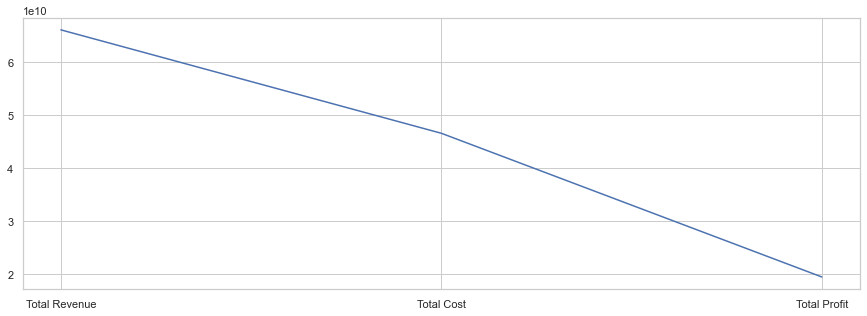

In [138]:
sumChart= (salesClean.agg({'Total Revenue':'sum',
                 'Total Cost':'sum',
                 'Total Profit':'sum'}))
plt.figure(figsize=(15,5))
plt.plot(sumChart)
plt.show()

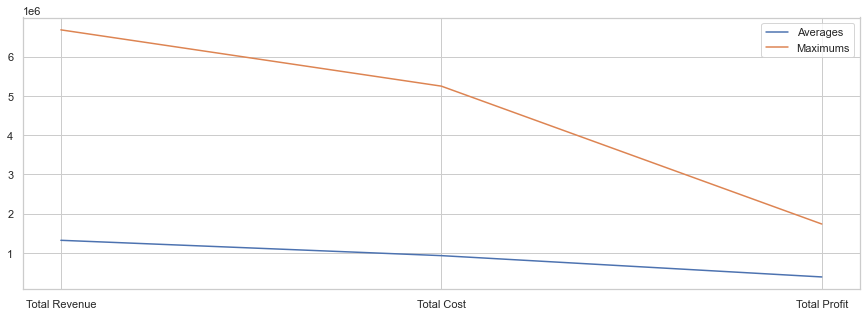

In [328]:
meanChart= (salesClean.agg({'Total Revenue':'mean',
                 'Total Cost':'mean',
                 'Total Profit':'mean'}))
maxChart= (salesClean.agg({'Total Revenue':'max',
                 'Total Cost':'max',
                 'Total Profit':'max'}))
plt.figure(figsize=(15,5))
plt.plot(meanChart, label = "Averages")
plt.plot(maxChart, label = "Maximums")
plt.legend()
plt.show()

### 4.5

In [155]:
with open("Project/MM_Calc.txt","a+") as writer:
    writer.write('Sums:\nUnits Sold: 2.498182e+08\nUnit Cost: 9.360768e+06\nTotal Revenue: 6.614500e+10\nTotal Cost: 4.662903e+10\nTotal Profit:1.951597e+10\n')
with open("Project/MM_Calc.txt","a+") as writer:
    writer.write('\nAverages:\nUnits Sold: 4.999263e+03\nUnit Cost: 1.873240e+02\nTotal Revenue: 1.323668e+06\nTotal Cost: 9.331219e+05\nTotal Profit: 3.905459e+05\n')
with open("Project/MM_Calc.txt","a+") as writer:
    writer.write('\nUnits Sold: 10000.00\nUnit Cost: 524.96\nTotal Revenue: 6682031.73\nTotal Cost: 5249075.04\nTotal Profit: 1738178.39')

# Cross-Refrence Statistics

## 1

In [396]:
regionCountry = salesClean.groupby(['Region'])['Country'].unique().apply(list).to_dict()
print(regionCountry)

{'Asia': ['Indonesia', 'India', 'South Korea', 'Kazakhstan', 'Mongolia', 'Malaysia', 'Singapore', 'Brunei', 'Kyrgyzstan', 'Taiwan', 'Sri Lanka', 'North Korea', 'Cambodia', 'Tajikistan', 'Turkmenistan', 'Maldives', 'Laos', 'Myanmar', 'Bhutan', 'Vietnam', 'Japan', 'Philippines', 'China', 'Bangladesh', 'Uzbekistan', 'Thailand', 'Nepal'], 'Australia and Oceania': ['Tuvalu', 'Samoa ', 'Fiji', 'Marshall Islands', 'New Zealand', 'Solomon Islands', 'Vanuatu', 'Australia', 'Papua New Guinea', 'Nauru', 'Kiribati', 'Tonga', 'Palau', 'East Timor', 'Federated States of Micronesia'], 'Central America and the Caribbean': ['Antigua and Barbuda ', 'Saint Kitts and Nevis ', 'Saint Lucia', 'Trinidad and Tobago', 'Guatemala', 'Saint Vincent and the Grenadines', 'Jamaica', 'Grenada', 'Honduras', 'Belize', 'Barbados', 'El Salvador', 'Dominican Republic', 'The Bahamas', 'Cuba', 'Nicaragua', 'Costa Rica', 'Panama', 'Dominica', 'Haiti'], 'Europe': ['Iceland', 'Russia', 'Moldova ', 'Malta', 'Greece', 'Ukraine',

## 2

In [397]:
regCo = pd.DataFrame.from_dict(regionCountry, orient='index').transpose()
regCo.to_csv('Project/Countries_By_Region.csv', mode= 'w', index = False)